#Plot a vector field

First let's look at a simple vector field plot. It requires four parameters `x`, `y`, `dx` and `dy`, where `dx` and `dy` determine the endpoints of the arrows attached to the points with coordinates given in `x` and `y`.

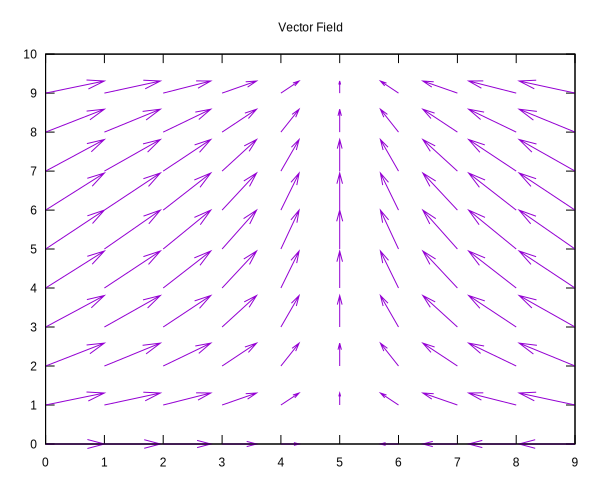

In [1]:
require 'gnuplotrb'
include GnuplotRB
include Math

x = Array.new(10) { (0..9).to_a }.flatten
y = (0..9).map { |i| Array.new(10) {i} }.flatten
dx = x.zip(y).map { |p| cos(p[0].to_f*PI/10.0) }
dy = x.zip(y).map { |p| sin(p[1].to_f*PI/10.0) }

Plot.new([[x,y,dx,dy], with: 'vectors'], 
         key: false, title: 'Vector Field')

##Colored arrows

Now, color the arrows according to their slope.

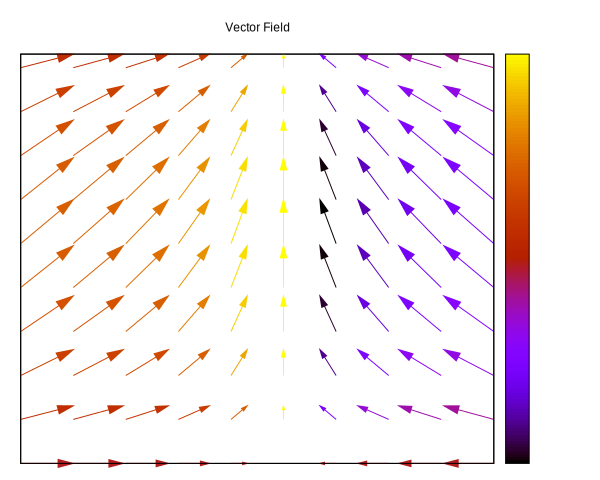

In [2]:
#the slopes of the vectors on the logistic scale
col = dx.zip(dy).map do |p| 
  p[0]==0 ? 1.0 : 1.0 / (1.0 + Math::exp(-p[1].to_f / p[0].to_f))
end

Plot.new([[x,y,dx,dy,col], with: 'vectors', filled: true, lc: 'palette'],
         key: false, tics: false, title: 'Vector Field')


##3D vector field

Vector fields may be visualized in 3D as well.

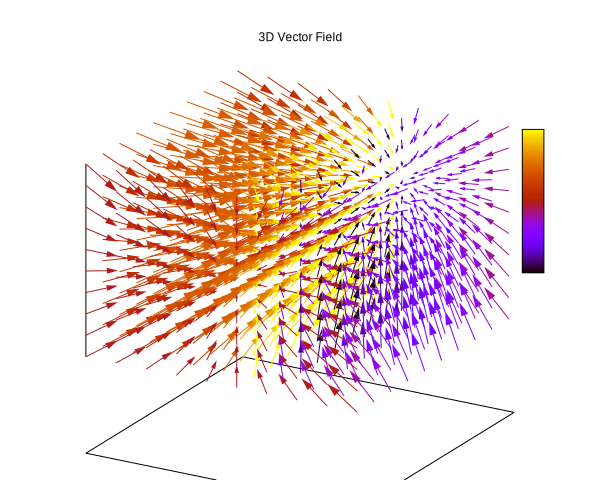

In [3]:
xx = ([x] * 10).flatten
yy = ([y] * 10).flatten
zz = (0..9).map { |i| Array.new(100) {i} }.flatten
dxx = xx.zip(yy, zz).map { |p| cos(p[0].to_f*PI/10.0) }
dyy = xx.zip(yy, zz).map { |p| sin(p[1].to_f*PI/10.0) }
dzz = xx.zip(yy, zz).map { |p| cos(p[2].to_f*PI/10.0) }
color = dxx.zip(dyy, dzz).map do |p| 
  p[0]==0 ? 1.0 : 1.0 / (1.0 + exp(-p[1].to_f / p[0].to_f))
end
Splot.new(
  [[xx,yy,zz,dxx,dyy,dzz,color], with: 'vectors', filled: true, lc: 'palette'],
  key: false,
  tics: false,
  title: '3D Vector Field'
)